In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.widgets import MultiCursor
import numpy as np

EOG Plots

In [2]:
e1 = pd.read_csv('E1M2.txt', skiprows=6, encoding = 'cp1252').rename(columns = {'Data:': 'Signal'}) 
e2 = pd.read_csv('E2M2.txt', skiprows=6, encoding = 'cp1252').rename(columns = {'Data:': 'Signal'})

In [19]:

E1 = {
    'Signal': e1['Signal'].rolling(100).mean() * (-1),
    'Type': 'Vertical',
    'Start Time': '23/12/2022 16:14:17',
    'Sample Rate': 128,
    'Length': 40384,
    'Units': 'µV',
    'Duration (s)': 315,
}

E2 = {
    'Signal': e2['Signal'].rolling(100).mean() * (-1),
    'Type': 'Horizontal',
    'Start Time': '23/12/2022 16:14:17',
    'Sample Rate': 128,
    'Length': 40384,
    'Units': 'µV',
    'Duration (s)': 315,
}

In [62]:
def random_epoch(mode = 0):

    if mode == 0:
        # Pick a random 30 second sample from both channels
        start = np.random.randint(0, 40384 - 30 * 128)
        end = start + 30 * 128

        fig = plt.figure(figsize=(11,5))
        gs = fig.add_gridspec(2,hspace=0)
        axs = gs.subplots(sharex=True)

        axs[0].plot(E1['Signal'][start:end], color = 'coral', label = 'EOG V')
        axs[1].plot(E2['Signal'][start:end], color = 'lightblue', label = 'EOG H')
        axs[1].set_xlabel('Time (s)')
        axs[0].set_title('EEG signal sample for 30 second epoch')
        axs[0].legend()
        axs[1].legend()

        # Set y axis label for whole figure
        fig.text(0.07, 0.5, 'Signal (µV) with rolling average of 100 samples', va='center', rotation='vertical')

        
        plt.legend()
        plt.xticks(np.arange(start, end, 128), np.arange(1, 31, 1))
        plt.show()

    elif mode == 1:
        # Pick a random 30 second sample from both channels
        start = np.random.randint(0, 40384 - 30 * 128)
        end = start + 30 * 128

        fig = plt.figure(figsize=(11,5))
        gs = fig.add_gridspec(2,hspace=0)
        axs = gs.subplots(sharex=True)

        axs[0].plot(E1['Signal'][start:end], color = 'coral', label = 'Vertical')
        axs[0].plot(E2['Signal'][start:end], color = 'lightblue', label = 'Horizontal')
        axs[0].legend()
        axs[1].plot(E1['Signal'][start:end] + E2['Signal'][start:end], label = 'Vertical + Horizontal')
        axs[1].axhline(y=100, color="black")
        axs[1].axhline(y=-100, color="black")
        axs[1].legend()

        plt.xticks(np.arange(start, end, 128), np.arange(1, 31, 1))
        plt.show()

def ordered_epoch():
    # Plot the first 10 30 second samples from both channels in single plots
    # Have 10 different plots one after the other, with the subsequent 30 seconds

    for i in range(10):
        start = i * 30 * 128
        end = start + 30 * 128

        fig = plt.figure(figsize=(14,5))

        plt.plot(E1['Signal'][start:end], color = 'coral', label = 'EOG V')
        plt.plot(E2['Signal'][start:end], color = 'lightblue', label = 'EOG H')
        plt.xlabel('Time (s) of current 30 second epoch')
        plt.ylabel('Signal (µV) with rolling average of 100 samples')
        plt.title('EEG signal sample for 30 second epoch')
        plt.legend()

        plt.xticks(np.arange(start, end, 128), np.arange(1, 31, 1))
        plt.show()

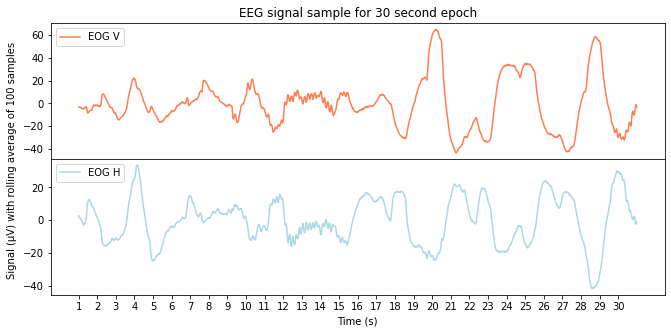

In [63]:
random_epoch(0)

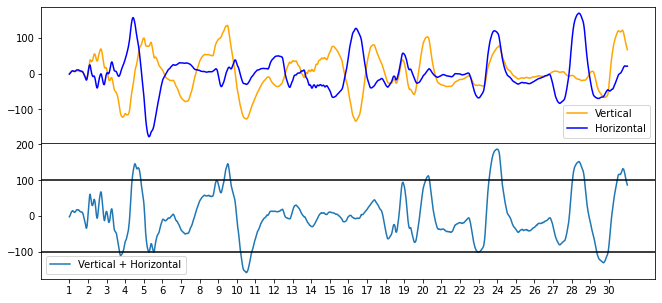

In [27]:
random_epoch(1)

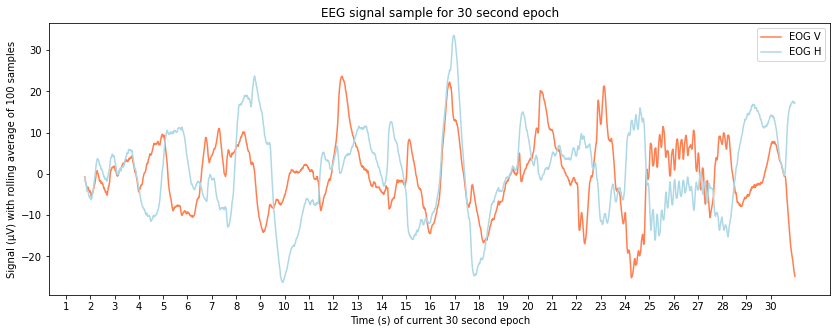

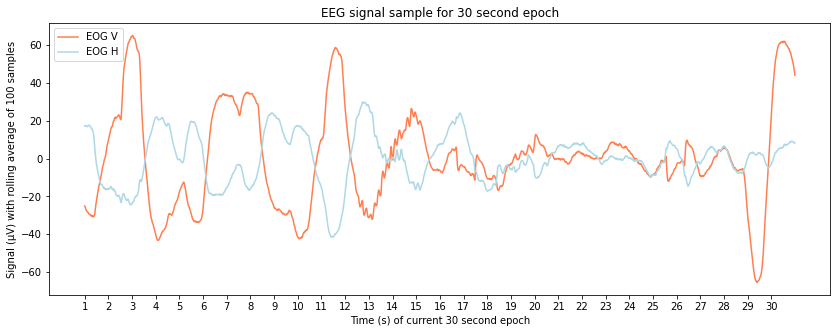

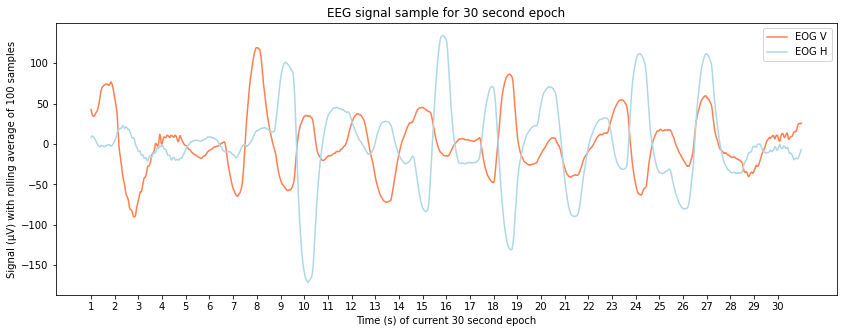

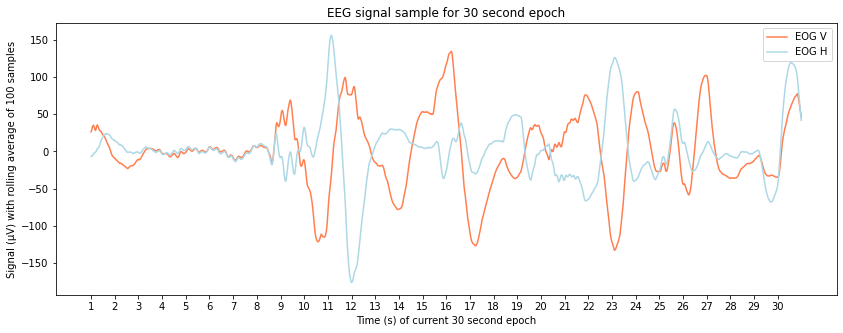

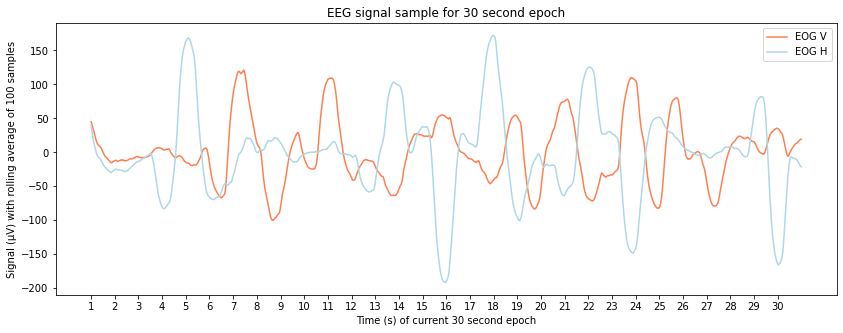

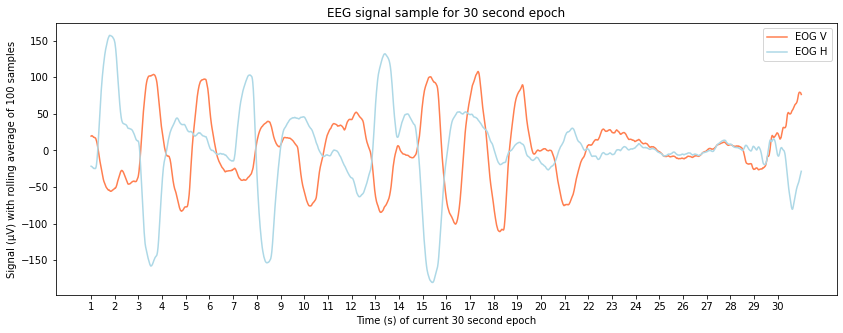

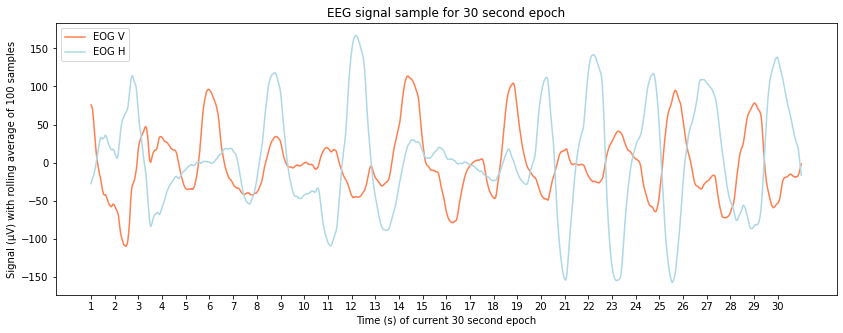

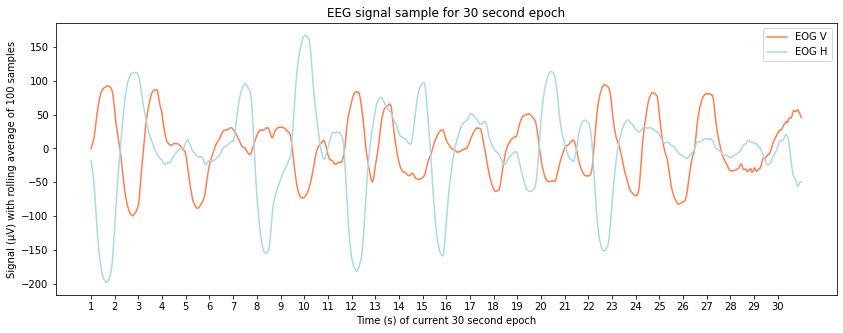

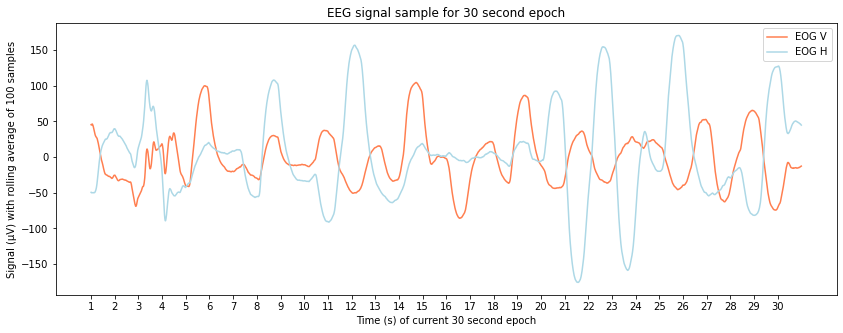

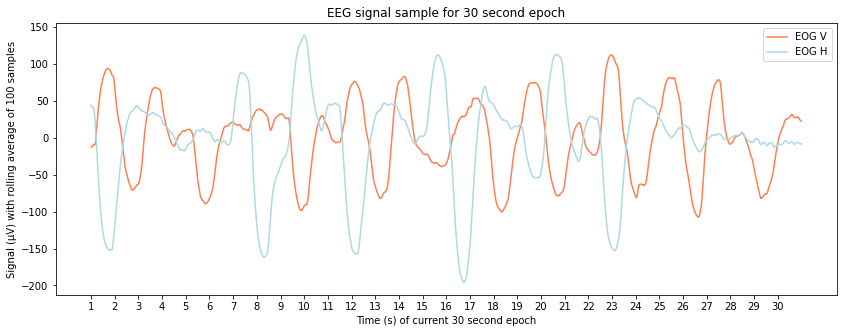

In [28]:
ordered_epoch()